In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from OPTICS import optics
from Visualization import visualization, interactive_visualization

In [2]:
df = pd.read_csv('iris-clustering.csv')

In [3]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [4]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
df_normalized.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.390160,0.434679,-0.578623,-0.569232
1,-0.518512,-0.057373,-0.608179,-0.598308
2,-0.578457,0.136859,-0.584726,-0.552043
3,-0.631489,0.042163,-0.540152,-0.554689
4,-0.414170,0.499298,-0.542513,-0.533708


In [5]:
data_array = df_normalized.values
data_list = data_array.tolist()
X = data_list
x = data_array

In [6]:
MinPts = 47
eps = 1.7

# Run OPTICS algorithm
cluster_labels = optics(x, MinPts, eps)

# Print cluster labels
print("Cluster Labels:", cluster_labels)

Cluster Labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [7]:
print(set(cluster_labels))
print(cluster_labels.count(1))
print(cluster_labels.count(2))

{1, 2}
48
99


In [8]:
silhouette_avg_optics = silhouette_score(x, cluster_labels)
ch_index_optics = calinski_harabasz_score(data_list, cluster_labels)
db_index = davies_bouldin_score(x, cluster_labels)
print("Silhouette Score: ",silhouette_avg_optics)
print("Calinsky Harabasz Score: ",ch_index_optics)
print("Davies Bouldin Index:", db_index)

Silhouette Score:  0.5585312225304857
Calinsky Harabasz Score:  207.13433058519018
Davies Bouldin Index: 0.6236449979049297


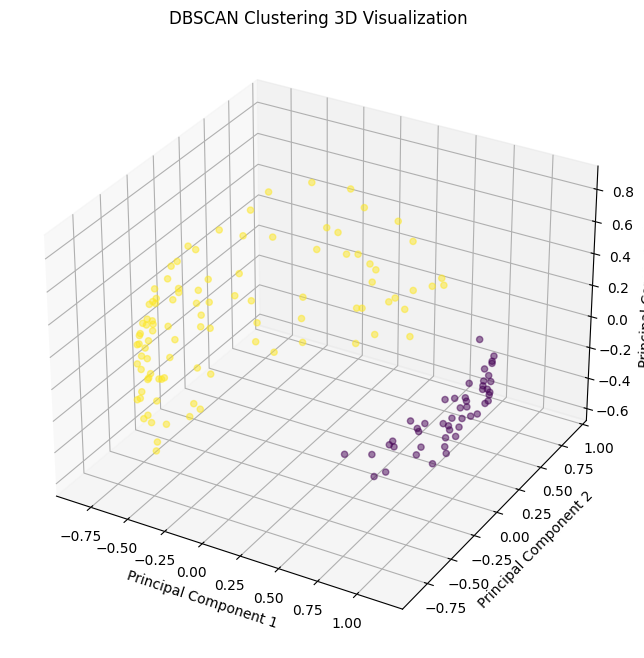

In [9]:
visualization(x, cluster_labels)

In [10]:
interactive_visualization(x, cluster_labels)